# **AM 207**: Homework 3

Verena Kaynig-Fittkau and Pavlos Protopapas  <br>
**Due: 11.59 P.M. Thursday March 17th, 2016**

### Instructions:

+ Upload your answers in an ipython notebook to Canvas.

+ We will provide you imports for your ipython notebook. Please do not import additional libraries.

+ Your individual submissions should use the following filenames: AM207_YOURNAME_HW3.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different language (or format). 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an executed status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: AM207_YOURNAME_HW3.tar.gz or AM207_YOURNAME_HW3.zip


### Have Fun!
_ _ _ _ _

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time
import timeit

import scipy.stats 
import pandas as pd
import pymc as pm

import re
import numpy as np

/home/kevin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Problem 1: Employee Satisfaction Improvement
This problem is going to explore the differences between complete pooling, unpooling and partial pooling for a normal model with observed standard deviations. 

You are working for a consulting firm which is trying to find a good strategy to improve employee satisfaction for their customers. Your company ran pilot studies in eight different customer companies and measured the improvement in employee satisfaction after the plan had been implemented for two years. The data you are given is the mean and standard deviation of the satisfaction improvement, measured by a survey. 
You follow the nature of your data by modeling the effect of the strategie with a normal model. To simplify things you can assume that the different standard deviations are an effect of different sample sizes, and that there is actually one underlying observation variance:

$$ \sigma_j^2 = \frac{\sigma^2}{n_j}$$

Thus the difference in the observed standard deviations in the survey results are caused by having different numbers of survey answers $n_j$. 

Discuss, create and compare three different solutions for your model using PYMC or another sampling method of your choice:

* complete pooling
* unpooling
* partial pooling

Here we assume that we are given the standard deviation $\sigma$ and aim to solve for the sample mean $\mu$. In all 3 cases we construct a model using pymc and sample from the posterior to estimate $\mu$. Then we use pymc to sample the posterior predictive and compare the sampled distribution with data. We use the pymc function Normal(mu,tau). We want to mention that here tau=1/variance. We discuss the 3 cases below:

* complete pooling

Here there is only 1 mean value $\mu$ we want to estimate. This approach implies that all data are coming from the same distribution. We have:

$P(\mu | \mu_j, \sigma_j) \propto P(\mu_j | \mu, \sigma_j) P(\mu)$. 

This can be simplified to 

$P(\mu | \mu_j, \sigma_j) \propto N(\mu_j | \mu, \sigma_j) N(\mu|0,\sqrt{1e10})$

Here we do not know much about the prior besides that it's gaussian,so we choose mean=0 and a large standard deviation. Our pymc implementation sets up the model and samples $\mu$ using mcmc. We show the first 500 and last 500 values in the trace plot. Having obtained the sampled $\mu$, we then sample the posterior predictive and compare it with the data. Note that in complete pooling there is only 1 $\mu$ value, but there are 8 $\mu_j$ in the posterior predictive distribution. The sampling summary is also printed out below. 

Note that the comparison between the sampled $\mu_j$ and data mean are not very close. This implies using complete pooling is likely to UNDERFIT the data. 


* unpooling

Here we estimate a mean value $\mu_j$ for each data point. This approach implies all data are from independent distributions. We use the pymc container class in our implementation. Please refer to our code for detail. We have:

$P(\mu_i | \mu_j, \sigma_j) \propto P(\mu_i | \mu, \sigma_j) P(\mu_i)$. 

This can be simplified to 

$P(\mu_i | \mu_j, \sigma_j) \propto N(\mu_i | \mu_j, \sigma_j) N(\mu_i|0,\sqrt{1e10})$

Note that here we estimate all 8 $\mu_i$. For simplicity we only show the trace plot of $\mu_1$ to show convergence.

Later we perform similar steps to sample the posterior predictive. Note that here the matching between posterior predictive and each data mean value is very close. This approach is typically subject to OVERFITTING since there are so many parameters. 

* partial pooling

Partial pooling is the compromise between complete pooling and unpooling. Here we estimate for 8 $\mu_j$ but force them to come from the same distribution with the same hyperparameters. Here we have: 

$P(\mu_i | \mu_j, \sigma_j) \propto P(\mu_i | \mu, \sigma_j) P(\mu_i)$. 

This can be simplified to 

$P(\mu_i | \mu_j, \sigma_j) \propto N(\mu_i | \mu_j, \sigma_j) N(\mu_i|\mu',\sqrt{1/\tau'})$

Here $\mu'$ and $\tau'$ are the hyperparameters that influence all $\mu_i$. Since we don't know much about the hyperparameters, we let them be uniform distributions and experiment with a relatively large range. This approach also requires the pymc container class. Please refer to our code for details. 

Here we estimate all 8 $mu_i$ and show $\mu_1$ 's trace plot. Then we sample from the posterior predictive and compare with sample mean. The comparison is better than the complete pooling but worse than the unpooling. This result make intuitive sense because partial pooling is a compromise between the two. Please refer to the attached code for implementation and statistics summary.


In [2]:
# Here is the data
data = np.double(np.array([[29.5,18.4],[6.3,12.7],[-3.9,15.9],[7.2,10.2],[-2.1,9.0],[1.8,12.1],[19.6,7.3],[12,18.6]]))
data_means = data[:,0]
data_std = data[:,1]

 [-----------------100%-----------------] 10000 of 10000 complete in 0.4 sec
complete_pooling_model:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	9.028            17.787           0.639          [-23.768  41.675]
	9.512            13.423           0.474          [-14.446  37.448]
	8.602            16.099           0.506          [-20.268  40.39 ]
	8.732            10.826           0.353          [-11.168  30.297]
	9.065            9.574            0.322          [ -8.98   28.251]
	8.761            12.737           0.438          [-16.59   33.146]
	8.818            8.638            0.313          [ -7.642  25.602]
	8.97             19.365           0.7            [-25.611  51.368]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-24.426          -2.926          8.37           21.

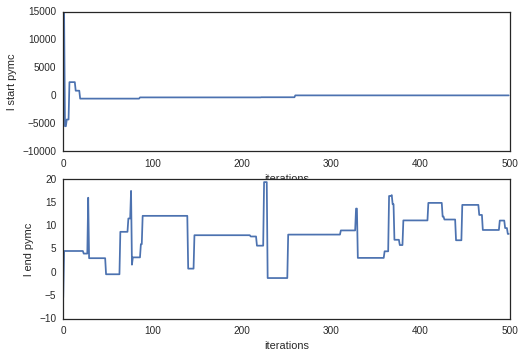

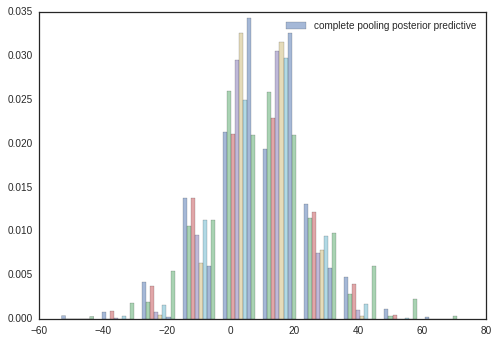

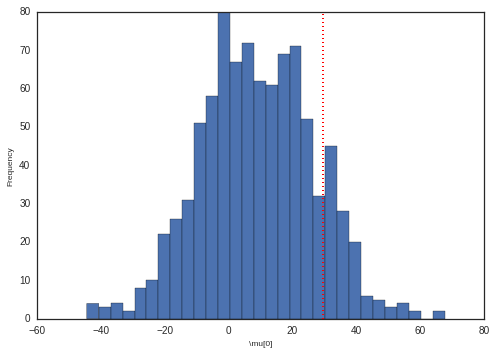

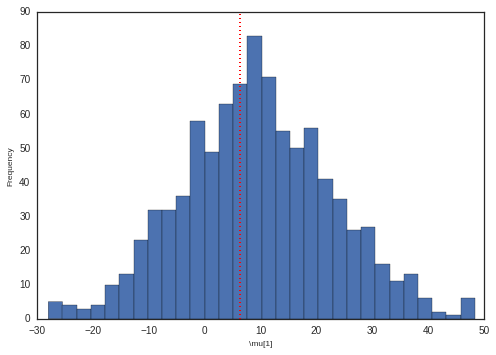

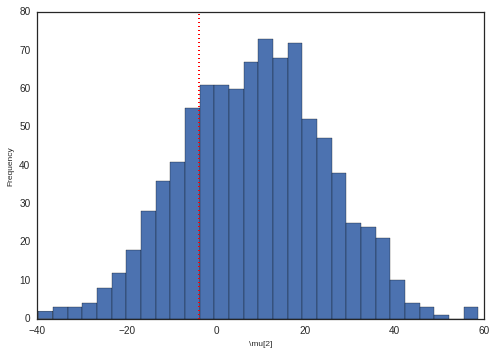

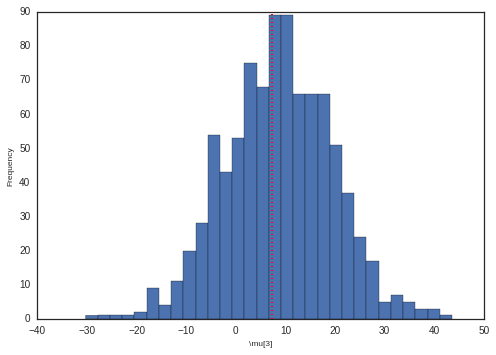

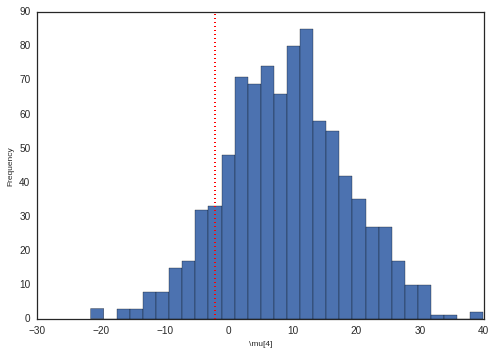

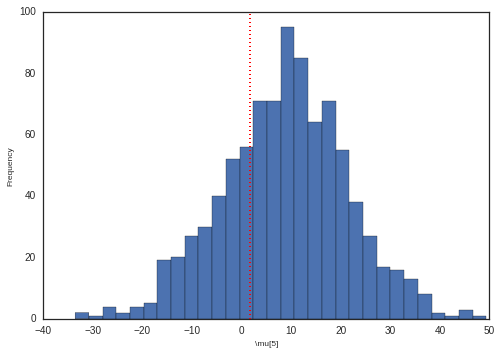

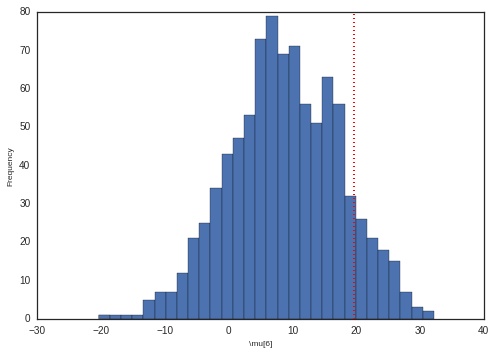

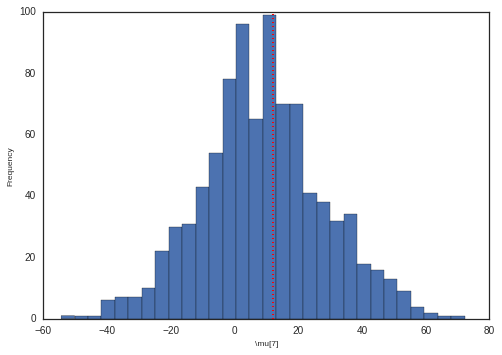

In [39]:
#complete pooling
#?pm.Normal, note: tau = 1/variance
mu = pm.Normal('mu',0,1/1e10)
likelihood = pm.Normal('likelihood',mu=mu,tau=1/data_std**2,value=data_means,observed=True)

complete_pooling_model = pm.Model([mu,likelihood])
mcmc = pm.MCMC(complete_pooling_model)

mcmc.sample(iter=10000,burn=0)

#analyze result
burnin = 500
plt.subplot(2,1,1)
plt.plot(mu.trace()[:burnin])
plt.xlabel('iterations')
plt.ylabel('l start pymc')

plt.subplot(2,1,2)
plt.plot(mu.trace()[-burnin:])
plt.xlabel('iterations')
plt.ylabel('l end pymc')

#posterior predictive
mu_pp = pm.Normal('complete_pooling_model',mu=mu)
pp_model = pm.Model([mu_pp])
mcmc = pm.MCMC(pp_model)
mcmc.sample(iter=10000,burn=1000,thin=10)

fig2 = plt.figure()
plt.hist(mu_pp.trace(),normed=True,alpha=0.5,label='complete pooling posterior predictive')
plt.legend()

fig3 = plt.figure()
pm.Matplot.gof_plot(mu_pp.trace(),data_means,name='\mu')

mcmc.summary()

 [-----------------100%-----------------] 10000 of 10000 complete in 2.2 sec
unpooling_model:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	31.115           25.144           0.815          [-23.724  76.043]
	7.308            19.038           0.646          [-28.947  45.29 ]
	-3.045           22.023           0.759          [-48.998  38.674]
	8.373            14.58            0.553          [-19.852  35.953]
	-3.027           13.285           0.492          [-27.306  24.879]
	1.657            17.632           0.62           [-33.897  34.03 ]
	19.691           10.498           0.418          [ -1.989  39.297]
	11.708           25.677           0.754          [-36.987  57.341]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-19.183          14.181          30.942         46.686    

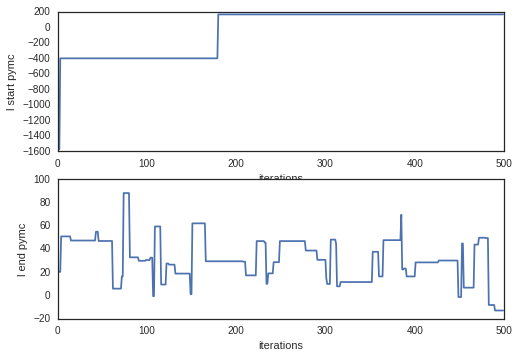

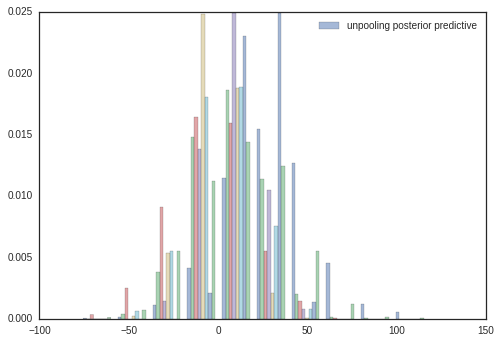

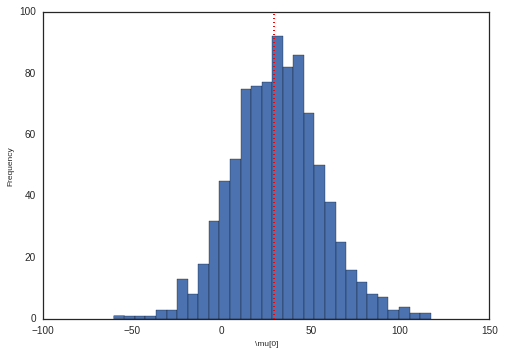

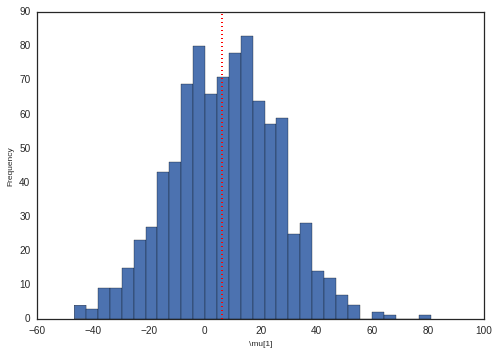

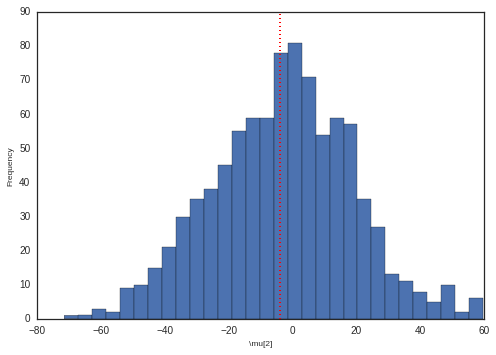

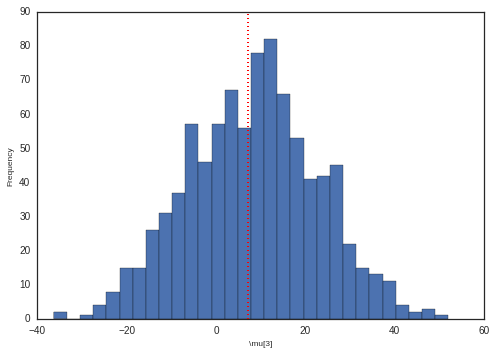

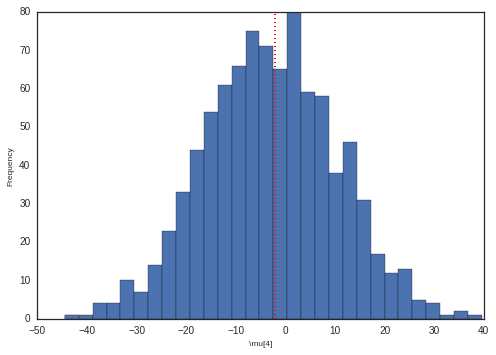

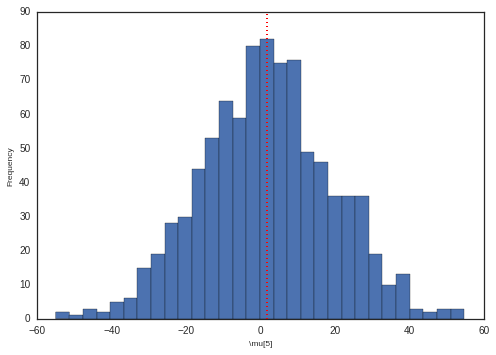

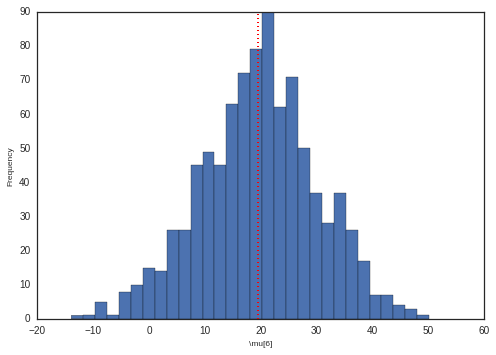

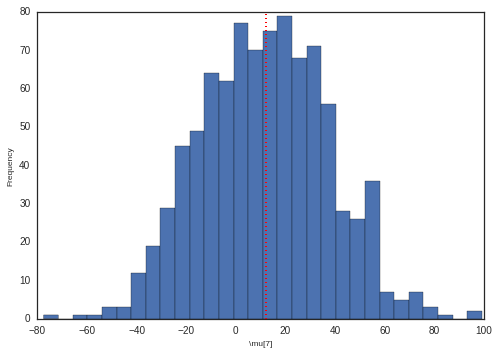

In [40]:
#unpooling: we solve for independent mu for each data point
mu = pm.Container([pm.Normal("mu_%i" %i, 0, 1/1e10) for i in range(8)])
likelihood = pm.Normal('likelihood',mu=mu,tau=1/data_std**2,value=data_means,observed=True)

unpooling_model = pm.Model([mu,likelihood])
mcmc = pm.MCMC(unpooling_model)

mcmc.sample(iter=10000,burn=0)

#analyze result
burnin = 500
plt.subplot(2,1,1)
plt.plot(mu[0].trace()[:burnin])
#plt.ylim(12,20)
plt.xlabel('iterations')
plt.ylabel('l start pymc')

plt.subplot(2,1,2)
plt.plot(mu[0].trace()[-burnin:])
#plt.ylim(12,20)
plt.xlabel('iterations')
plt.ylabel('l end pymc')

#posterior predictive
mu_pp = pm.Normal('unpooling_model',mu=mu)
pp_model = pm.Model([mu_pp])
mcmc = pm.MCMC(pp_model)
mcmc.sample(iter=10000,burn=1000,thin=10)

fig2 = plt.figure()
plt.hist(mu_pp.trace(),normed=True,alpha=0.5,label='unpooling posterior predictive')
plt.legend()

fig3 = plt.figure()
pm.Matplot.gof_plot(mu_pp.trace(),data_means,name='\mu')

mcmc.summary()



 [-----------------100%-----------------] 10000 of 10000 complete in 2.2 sec
mu_7:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	4.489            1.3              0.042            [ 2.177  7.257]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	1.883            3.624           4.495          5.365         7.0
	

mu_2:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	4.364            1.284            0.042            [ 2.148  7.153]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	1.787            3.472           4.329          5.254         6.868
	

mu_3:
 
	Mean             S

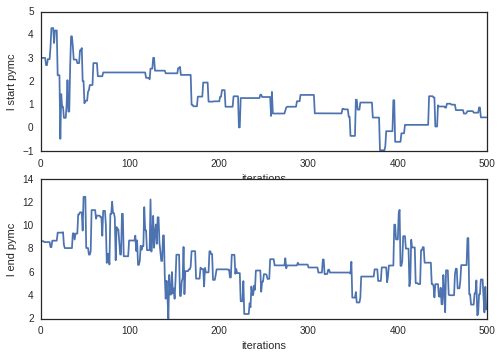

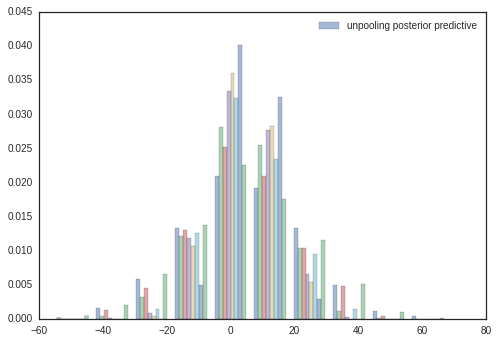

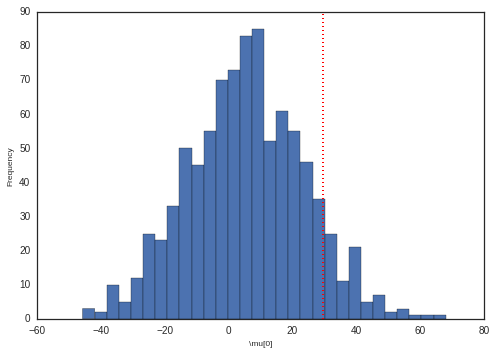

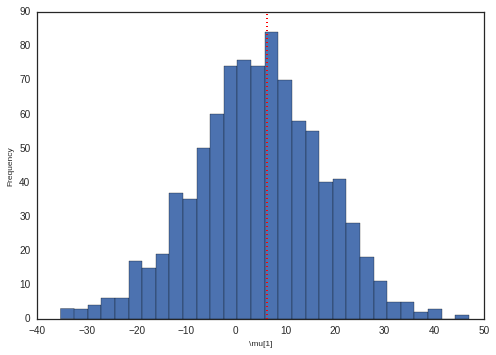

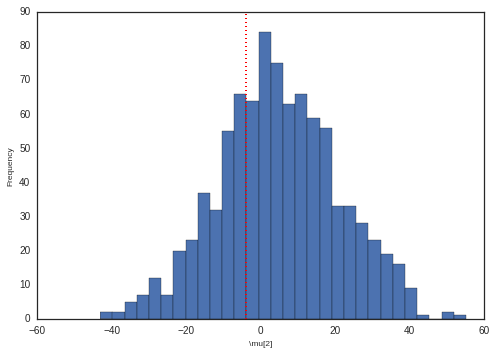

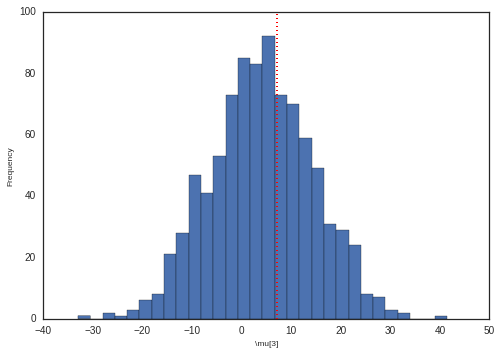

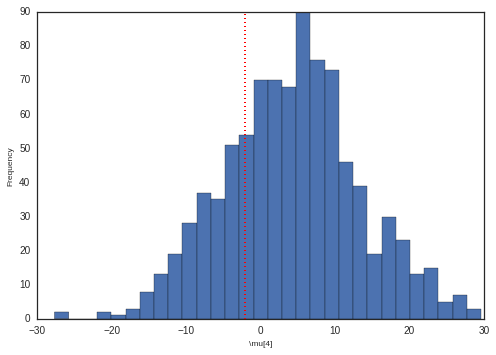

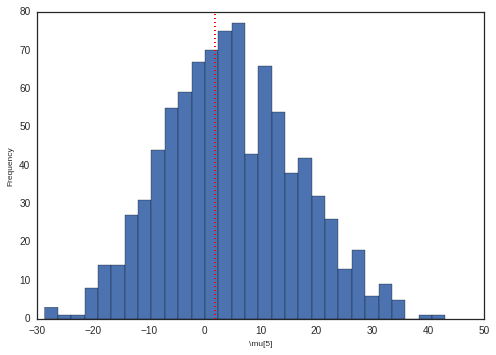

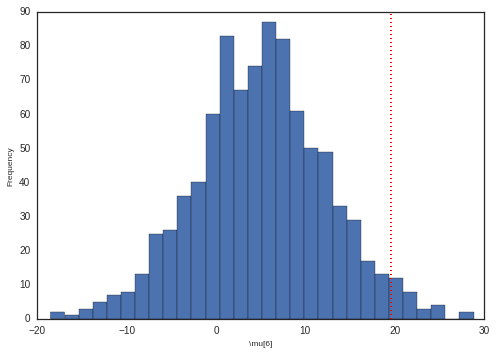

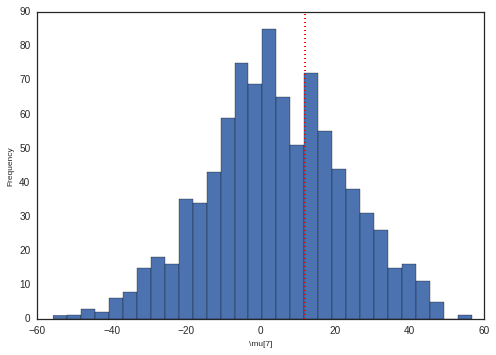

In [38]:
#partial pooling: we solve for independent mu for each data point generated from the same distribution
mu_of_mu = pm.Uniform("mu_of_mu",-30,60)
tau_of_mu = pm.Uniform("tau_of_mu",1e-10,10)

mu = pm.Container([pm.Normal("mu_%i" %i, mu_of_mu, tau_of_mu) for i in range(8)])
likelihood = pm.Normal('likelihood',mu=mu,tau=1/data_std**2,value=data_means,observed=True)

partial_pooling_model = pm.Model([mu,likelihood])
mcmc = pm.MCMC(partial_pooling_model)

mcmc.sample(iter=10000,burn=0)

#analyze result
burnin = 500
plt.subplot(2,1,1)
plt.plot(mu[0].trace()[:burnin])
#plt.ylim(12,20)
plt.xlabel('iterations')
plt.ylabel('l start pymc')

plt.subplot(2,1,2)
plt.plot(mu[0].trace()[-burnin:])
#plt.ylim(12,20)
plt.xlabel('iterations')
plt.ylabel('l end pymc')

#posterior predictive
mu_pp = pm.Normal('partial_pooling_model',mu=mu)
pp_model = pm.Model([mu_pp])
mcmc = pm.MCMC(pp_model)
mcmc.sample(iter=10000,burn=1000,thin=10)

fig2 = plt.figure()
plt.hist(mu_pp.trace(),normed=True,alpha=0.5,label='unpooling posterior predictive')
plt.legend()

fig3 = plt.figure()
pm.Matplot.gof_plot(mu_pp.trace(),data_means,name='\mu')

mcmc.summary()


# Problem 2: Motif Finding Using Gibbs

One interesting problem in bioinformatics is that of finding common subsequences of nucleotid bases (these subsequences are called motifs) that repeat themselves within larger DNA sequences. The problem is relevant for genetics because locating the positions of these motifs within the DNA sequence helps in the understanding of how genes are regulated.

Suppose that you are a biologist who is analyzing genetic material collected in a nearby asteroid. The DNA of this extraterrestrial form of life is formed as a sequence of $n_B = 5$ nucleotide bases. Let us label these extraterrestrial nucleotides as 'M', '0', '2', 'A', and '7'. You have a DNA sample $\mathcal{S}$ consisting of $p=20$ sequences of DNA, each of them with a lenght $l=200$ nucleotide bases that you can find in <a href="HW3/Sequences_new.dat">this file</a>. Each row of the file is a DNA sequence. You are asked to find a motif of $q = 5$ consecutive nucleotides hidden in the background that appears to repeat itself very often in the DNA you were given, but that appears only once in each of the sequences.

Let us formalize the problem. The starting positions of the motif within each sequence (our missing data in the problem) can be represented by the set of random variables:

$$
\mathcal{A} = \left\{a_k, k = 1,...,p\right\}
$$

The motif has to start somewhere within the sequences and so for each sequence $\mathcal{S_k}$:

$$
\sum_{i=1}^{l}P(a_k=1) = 1
$$

What we are after is the joint distribution $P(\mathcal{A}|\mathcal{S})$ for the motif alignment (i.e., its starting position) being $a_k$ for sequence $\mathcal{S}_k$. As shown in [this paper](http://www.cs.cmu.edu/~epxing/Class/10810/readings/liu.pdf), for each sequence $\mathcal{S}_k$ (think of each sequence as a dimension of our parameter space) we can obtain the conditional probability: 

$$
P(a_k=i|\mathcal{A_{\hat{k}}},\mathcal{S})=\frac{1}{Z}\prod_{j=1}^q\left(\frac{\hat{\theta}_j}{\hat{\theta}_0}\right)^{s_{i+j-1}}
$$

where $\mathcal{A_{\hat{k}}}$ refers to the alignments in all sequences other than $\mathcal{S}_k$, and $Z$ is a normalization factor. Of the other quantities, $s_x$ is a vector index for the *x-th* position in the sequence, with length $q$ and value 1 at the entry corresponding to base $a_k$ and 0 for all other entries. Finally, vectors $\hat{\theta_j}$ and $\hat{\theta_0}$ contain respectively the probabilities of observing the $q$ bases at the corresponding position of the current sequence, and the probabilities of finding the same bases in the background.

Your only task is to design a Gibbs algorithm that samples the joint probability $P(\mathcal{A}|\mathcal{S})$. Your algorithm should converge and provide the alignments of the motif and the secret motif itself. Here are some hints/tasks that should help you and that will help the TF grading your homework:

(a) Describe the equation for the conditional probabilities in your own words, and make sure you understand it before you code anything. Be as explicit as possible.

(b) Start by assigning random starting positions for the $q$-long motif in all sequences. Then exclude a particular sequence $S_k$ (your current sequence) and use the remaining sequences to construct $\hat{\theta_j}$ as a probability matrix from counting the number of times that the *i-th* base appears in position $j$ of the motif given the current alignments. Construct a similar matrix $\hat{\theta_0}$ from counting the number of times that the *i-th* base appears in the background.

(c) From your $\hat{\theta_j}$ and $\hat{\theta_0}$ matrices, derive the conditional probability over all possible alignments for your current sequence and draw a sample from it. This sample will be your updated alignment for the current sequence. 

(d) Iterate over all $p$ sequences. Such iteration over sequences is only one Gibbs iteration. After enough Gibbs iterations you should start noticing that the algorithm has converged.


(a) $P(a_k = 1 | A_\hat{k},S) $ is the probability of the motif in the kth sequence starts at position i given the starting position of all other sequences $\{a_1, a_2, ... a_{k-1}, a_{k+1}...a_p\}$ and the sequences S. Here Z is a normalization constant. 

$\hat{\theta_0}$ is a vector such that $\hat{\theta_{0i}}$ is the probability of base[i] in the background. We can compute that by counting the number of occurences of base i in all the p-1 sequences (exclude the kth one we are considering) and normalizing by (len_sequence - len_motif)*(p-1). The end result is that $\theta_0$ is a vector of length 5. 

$\hat{\theta} $ is a matrix such that $\hat{\theta}_{ij}$ is the probability that ith base appears in jth position of the motif. Here $\hat{\theta}$ is a matrix of size num_base * base length. For this problem. $\hat{\theta} $ is a $5 \times 5$ matrix. We can compute $\theta_ij$ but counting the number of occurences base i occurs at postion j of the motif and normalize by len_motif * (p-1). 

Now that we know how to compute $\hat{\theta}$ and $\hat{\theta}_0$ we can describe the conditional probability formula. Here the exponent vector $s_{i+j-1}$ is a selection vector that selects the current i+j-1 th base at position j. For any given start position i, we can obtain a corresponding motif from that sequence starting at i (excluding the last 4 positions). Then $s_{i+j-1}$ selects the corresponding row of the $\theta$ matrix that corresponds to the base at that motif position. Consequently, the quantity $\left(\frac{\hat{\theta}_j}{\hat{\theta}_0}\right)^{s_{i+j-1}}$ returns a scalar. Intuitively, we compute the probability of the base occuring at position j for j=1 to 5 so we need to compute the product. The product really considers the probability of the motif base happening at each consecutive location. Finally, Z is the normalization factor. 

To solve this problem, we need to compute the matrix $\hat{\theta}$ and vector $\hat{\theta}_0$ for each conditional. Then for the current unknown sequence of interest, we loop through the sequence to calcualte the conditional probability for each position i. Note that $s_{i+j-1}$ serves as the selection vector. After we construct the discrete probability distribution, we compute the CDF and sample from the inverse CDF to obtain the current alignment. Next, we move to the next sequence. We repeat this procedure iteratively and hopefully we can achieve convergence.

In [68]:
#load in sequence data
with open('HW3/Sequences_new.dat', 'r') as myfile:
    data=myfile.read()  
sequences = data.split('\n')
num_sequence = len(sequences)-1; len_sequence = len(sequences[0])
sequences = sequences[0:num_sequence] #remove last empty row
print 'load in data:', num_sequence, 'sequences each of length ', len_sequence

#initialize the a_k randomly
A_vec = np.random.randint(0,len_sequence-5,num_sequence)
#print A_vec

#function to count occurences of a string
def count_occurence(base_vec,string):
    #initialize
    count = np.zeros(len(base_vec),dtype = 'float')

    for i in xrange(len(base_vec)):
        count[i]=string.count(base_vec[i])
    
    return count
    
#function that counts occurences of a base i at position j
def count_occurence_position(base_vec,motif):
    #initialize
    count = np.zeros((len(base_vec),len(motif)),dtype = 'float')
    
    for j in xrange(len(motif)):
        i = base_vec.index(motif[j])
        count[i,j]+=1
    
    #for debugging
    #print 'base_vec=' ,base_vec
    #print 'motif = ', motif
    #print count
    #assert(0)
    return count
    
#function that calculates theta matrix and theta_0 vector
def compute_theta(A_k,ind,data=sequences):
    theta = np.zeros((5,5),dtype = 'float')
    theta_0 = np.zeros(5,dtype = 'float')
    
    indices = np.delete(np.arange(0,num_sequence,dtype=int),ind)
    #print indices
    
    #comptue theta_0
    for i in indices:
        background = sequences[i][0:A_k[i]] + sequences[i][A_k[i]+5:]
        theta_0 = theta_0 + count_occurence('M02A7',background)
        
        motif = sequences[i][A_k[i]:A_k[i]+5]
        theta = theta + count_occurence_position('M02A7',motif)

    #normalize
    theta = theta / np.sum(np.sum(theta))
    theta_0 = theta_0 / np.sum(theta_0)
    return theta, theta_0


#compute conditional probability
def compute_conditional_prob(string,theta,theta_0):
    #initialize
    c_pdf = np.ones(len(string),dtype='float')
    c_pdf[-4:] = 0
    
    base_vec = 'M02A7'
    #update element by element
    for i in xrange(len(string)-4):
        local_motif = string[i:i+5]
        
        #selector function of local motif
        for j in xrange(5):
            ind = base_vec.index(local_motif[j])
            c_pdf[i] *=theta[ind,j]/theta_0[ind]
    
    c_pdf = c_pdf / np.sum(c_pdf)
    c_cdf = np.cumsum(c_pdf)
    return c_pdf, c_cdf

print 'start solver\n'


#do num_iter Gibbs iteration
num_iter = 500

#history vector to record the solutions
history = np.zeros((num_iter,num_sequence),dtype='int')

for iter_ind in xrange(num_iter):
    
    #start from 1st sequence
    for k in xrange(num_sequence):
        #compute normalized theta and theta_0 vector
        theta, theta_0 = compute_theta(A_vec,k)
        
        #print theta, '\n',theta_0
        #assert(0)
        
        #conditional probability of length 200 (length of an sequence)
        c_pdf,c_cdf = compute_conditional_prob(sequences[k],theta,theta_0)
        
        #update A_vec(k) by sampling
        A_vec[k] = np.argmin(c_cdf < np.random.uniform(0,1,1))
        
        
        #print c_cdf
        
        
        #print theta,theta_0
        #print np.sum(theta_0)
        #print np.sum(np.sum(theta))
        #assert(0)
        #print 'finish'
        
    #save result
    history[iter_ind,:] = A_vec    

#print result



    


load in data: 20 sequences each of length  200
start solver



predicted motif by each sequence is: 
A7770
2A7M0
AA7M0
2AM72
A7M02
A770A
AAM00
A7MMA
2AMM2
A7M7A
A7M02
AA7M0
2AM70
AAMM0
2A772
2AM72
A777A
A7M02
277M2
27MMA


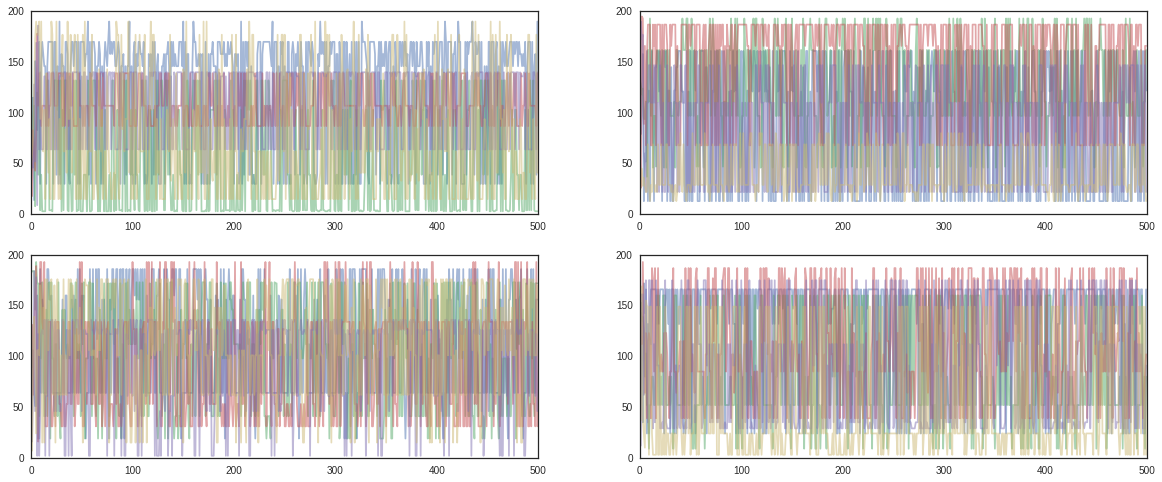

In [67]:
#plot the result
fig = plt.figure(figsize=[20,8])

print 'predicted motif by each sequence is: '
for i in xrange(num_sequence):
    plt.subplot(2,2,i/5 + 1)
    plt.plot(history[:,i],alpha=0.5)
    print sequences[i][A_vec[i]:A_vec[i]+5]
    

# Problem 3: Optimizing Hand Luggage

You are going on a trip and have to optimize your hand luggage, but thanks to your cheap flight ticket, the weight of the hand lugagge is restricted and you are sure the airline will enforce the upper limit. You have a set of presents that you want to bring to the relatives you are visiting, but you have to notice that they don't all fit into your suitcase. 

This problem is also called the knapsack problem: given a set of items, each has its weight and value, determine which items should be included into your suitcase, so that the total weight does not exceed some value $W$ and the total value is maximal. The kind of the knapsack problem when each item can be included into the collection at most once is called the 0/1 knapsack problem. Your task is to solve this problem using simulated annealing. 

Implement simulated annealing to solve this problem with the list of items below. Which ones would you pick for your suitcase? Plot and discuss your optimization scheme and results. 
Compare your solution to a greedy algorithm, which sorts the items by the ratio $\frac{v_i}{w_i}$ and puts them into the suitcase consecutively.

The knapsack problem has the formulation: 

$\max \sum_{i=1}^n v_i x_i$

subject to 
$\sum_{i=1} ^n w_i x_i \leq W$

Here we can let $x_i \in {0,1}$ , where 1 represents item i is in the bag and 0 represents item i is out of the bag.

We aim to solve for a vector of length N consisting of either 0 or 1s. This problem is NP hard, so we solve the problem using a greedy algorithm and simulated annealing. 

First, we solve the problem using a greedy algorithm. We rank the items using the ratio $\frac{v_i}{w_i}$ from largest to smallest. Then we incrementally add the ranked item into our luggage. If current_weight + weight(i) <= W, then we add the item. Otherwise, we skip the item and move onto the next item. In this fashion, we loop through all items once. 

The greedy method returns the list: [41 77 70 88 80  0 68 58 78  3 38 10 39 92 11 49 96 18 79 50 19 85 32], with value =  897 and weight =  2806. The computational cost is O(N). Please refer to our implementation in the attached code below. 

For simulated annealing, we implement an algorithm similar to that given in the lecture 12 note. In each step. we randomly choose L items, then for each item we throw a coin to determine whether we change from the current state (i.e take it out of bag or leave it in if it's currently in, vice versa). After this swapping, we check if the proposed solution is feasible, more precisely if we still respect the weight constraint. If not, then we propose again until a valid proposal is given. 

Next, we follow the standard procedure of calculating the new value. Delta of energy is $\triangle E = E_{new} - E_{prev}$. The acceptane probability is computed as 

$P = exp(\triangle E/T) \ if \triangle E < 0$, otherwise, $P =1$. 

We reheat if the temperature falls below a threshold value. In each epoch we reduce the temperature linearly: $T_{k+1}=\alpha T_{k}$. There are 3 potential stopping criteria: 

1. the standard deviation with respect to the mean in the final m points are small
2. the total number of iterations exceeds our chosen limit
3. the objective function reaches a desired value

Here we set 3 to be the sum of all item values. Consequently, the SA method terminates only due to the first 2 conditions. We manually set the SA parameters through experimentation. The SA method returns the list: [ 0  3 10 17 18 19 25 38 39 41 49 50 58 68 70 77 78 79 80 85 88 92 96] with value =  916 weight=  2995. This solution is better than the greedy method. Please refer to the attached code for implementation and convergence plot. 

In [3]:
# here is your data:

#number_of_data_points
N = 100

#total_weight_limit 
W = 3000

# weight of all the different items
w = np.array([  38,  236,  909,   73,  768,  906,  716,  646,  848,  961,  145,
        130,  973,  584,  750,  509,  391,  282,  179,  277,  255,  358,
        915,  469,  908,  253,  491,  669,  926,  399,  563,  581,  216,
        984,  754,  504,  479,  865,   87,  142,  394,    8,  320,  830,
        535,  314,  514,  897,  317,  210,  265,  729,  654,  628,  432,
        634,  457,  543,   72,  388,  455,  918,  562,  314,  516,  965,
        793,  498,   44,  589,   27,  821,  337,  622,  884,  298,  467,
         16,   65,  197,   26,  368,  739,  472,  904,  283,  666,  617,
         23,  778,  708, 1000,  127,  280,  382,  357,  156,  934,  314,
        596])

# value of all different items
v = np.array([36, 38, 30, 32, 40, 45, 45, 37, 49, 40, 44, 30, 31, 47, 43, 33, 30,
       43, 36, 50, 36, 32, 42, 41, 37, 43, 38, 41, 42, 41, 50, 34, 37, 37,
       43, 34, 46, 48, 30, 43, 40, 47, 37, 40, 50, 30, 42, 31, 39, 48, 49,
       31, 32, 42, 37, 32, 40, 30, 39, 48, 36, 32, 37, 37, 46, 45, 35, 47,
       40, 50, 46, 35, 43, 47, 48, 31, 50, 40, 30, 37, 30, 49, 47, 44, 43,
       50, 50, 41, 36, 43, 45, 39, 32, 37, 35, 34, 35, 38, 43, 47])

In [4]:
#solution of the greedy method
ratio_ind = np.argsort(v/(w-0.0))
ratio_ind = ratio_ind[::-1]
#print ratio_ind

#greedy algorithm
tot_weight = 0
items = np.zeros(N,dtype='int')-1

for i in xrange(N):
    if tot_weight + w[ratio_ind[i]] <= W:
        items[i] = ratio_ind[i]
        tot_weight += w[ratio_ind[i]]

items = items[items!=-1]

print 'greedy solution, total value =', np.sum(v[items]), 'total weight = ', tot_weight



greedy solution, total value = 897 total weight =  2806


greedy solution is:  [41 77 70 88 80  0 68 58 78  3 38 10 39 92 11 49 96 18 79 50 19 85 32] with value =  897 and weight =  2806
current iteration is  1000 out of  20000
current weight is:  2778
current iteration is  2000 out of  20000
current weight is:  2882
current iteration is  3000 out of  20000
current weight is:  2953
current iteration is  4000 out of  20000
current weight is:  2932
current iteration is  5000 out of  20000
current weight is:  2876
current iteration is  6000 out of  20000
current weight is:  2955
current iteration is  7000 out of  20000
current weight is:  2827
current iteration is  8000 out of  20000
current weight is:  2619
current iteration is  9000 out of  20000
current weight is:  2886
current iteration is  10000 out of  20000
current weight is:  2898
current iteration is  11000 out of  20000
current weight is:  2965
current iteration is  12000 out of  20000
current weight is:  2972
current iteration is  13000 out of  20000
current weight is:  2705
current i

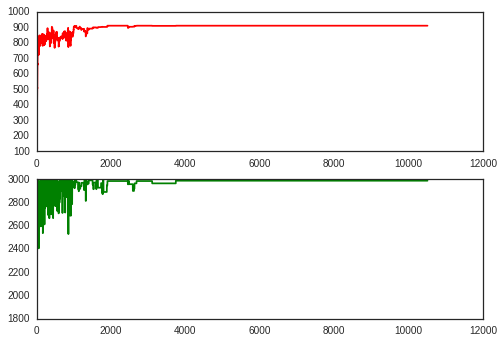

In [5]:
#function to swap items in and out of the bag
#sol: vector of 1 or 0
#L: number of items to be swapped
def swap_bags(sol,L):
    swapped_sol = sol.copy()
    
    no_change_prob = 0.5
    #swap 1 and 0
    for i in xrange(L):
        swp_ind = np.random.randint(0,len(sol),1)
        if np.random.uniform(0,1,1) > no_change_prob:
            swapped_sol[swp_ind] = (swapped_sol[swp_ind] +1 ) % 2
            
    #print swapped_sol
    return swapped_sol

#simulated annealing
#value: array of item values
#cost: corresponding array of item cost
#init_sol: initial solution
#init_temp: initial temperature
#ftol, itol: otol: function, iteration and objective function stopping criteria
#reannealing: schedule for reheating (number of iteration)

def simulated_annealing(value,cost,init_sol,init_temp,thermostat,ftol,itol,otol,reannealing):
    #sol = np.zeros(value.shape)
    sol = init_sol
    
    #length for comparion: 
    m = 10000;
    value_vec =[]
    weight_vec = []
    prev_value = np.sum(v[init_sol==1])
    temperature = init_temp
    
    #number of accepted steps
    it = 0
    
    #number of iterations
    atp = 0
    
    while it>=0:
        #number of items to take in and out
        #L = np.max((np.floor(np.sqrt(temperature)).astype(int),1))
        L = np.ceil(temperature).astype(int)
        #print L
        
        #propose a FEASIBLE sol
        proposed_sol = swap_bags(sol,L)
        
        #print proposed_sol
        while np.sum(w[proposed_sol==1])>W:
            #print('re-proposing because exceeds limit')
            proposed_sol = swap_bags(sol,L)
        
        
        new_value = np.sum(v[proposed_sol==1])
        new_weight = np.sum(w[proposed_sol==1])
        delta_value = new_value - prev_value
        
        #print proposed_sol
        #print delta_value
        #assert(0)
        
        #move to new step 
        if new_value > prev_value or np.random.rand() < np.exp(delta_value/temperature):
            sol = proposed_sol.copy()
            prev_value = new_value
            value_vec.append(new_value)
            weight_vec.append(new_weight)
            it += 1
        
        atp += 1
        
        #check if it is time to cool down
        if it % reannealing ==0:
            temperature = thermostat * temperature # linear
            
            #reheat if too cold
            if temperature < 0.01:
                temperature = 2
        
        #debugging
        if True and not (atp % 1000 ):
            print 'current iteration is ', atp, 'out of ', itol
            print 'current weight is: ', np.sum(w[proposed_sol==1])
        
        #terminating condition
        if len(value_vec)>m and np.std(value_vec[-m:])/np.mean(value_vec[-m:]) < ftol:
            print 'ftol'
            break
        if atp >itol:
            print 'itol'
            break
        if len(value_vec)> 0 and value_vec[-1] >= otol:
            print 'otol'
            print value_vec[-1]
            break
            
    #print atp
    
    return sol,value_vec,weight_vec,float(it)/atp

if __name__ == '__main__':
    #initialize solution (from )
    print 'greedy solution is: ', items, 'with value = ', np.sum(v[items]), 'and weight = ', np.sum(w[items])
    init_sol = np.zeros(v.shape)
    init_sol[items] = 1
    
    #solve using simulated annealing
    init_temp = 10.0
    thermostat = 0.90
    ftol = 0.01
    itol = 20000
    otol = np.sum(w)
    reannealing = 500
    
    #start with all zeros
    init_sol[:]=0
    sa_sol,value_hist,weight_hist, accept_rate = simulated_annealing(v,w,init_sol,init_temp,thermostat,ftol,itol,otol,reannealing)
    
    item_indices = np.arange(len(v))
    print 'simulated annealing solution is: ', item_indices[sa_sol==1], 'with value = ', value_hist[-1], 'weight= ', weight_hist[-1]
    
    #plot solution
    plt.subplot(2,1,1)
    plt.plot(value_hist,'r-')
    
    plt.subplot(2,1,2)
    plt.plot(weight_hist,'g-')

# Problem 4: Confusing Classifications

You are a graduate student conducting research in image processing.  You want to test out your latest algorithm, which you decide to call "Ultra-Multilayer Hierarchical Super Convolutionary Neural Network."  However, in order to test out your algorithm, you need a sizable training data set. Luckly, your advisor has generously given you over 10 GB of over one million stock photos of cats and dogs.  Unfortunately, none of the images are labelled.  Fantastic!  You enjoy looking at photos of puppies and kittens in your spare time anyways so you decide to dedicate this entire weekend to labeling all of them. 

<table>
<tr>
 <td><img src="HW3/cat.jpeg" width=150>
 </td>
 <td><img src="HW3/dog.jpeg" width=150>
 </td>
</tr>
</table>

However, after spending two hours looking over hundreds of images, these puppies and kittens are no longer looking so cute.  In fact, you are starting to get disgusted at the idea of looking at another picture of these furry creatures.  

At this time, you decide to tap into the "power of the crowd" by farming out the labeling task to the workers of Amazon Mechanical Turk (MTurk). You decide to hire 3 MTurk workers.  However, you're not sure if these workers are reliable. So, how can you quantify the competency of the workers? In this problem you will develop a model to access the general difficulty of labeling the images of your two classes. 

Classifying items in general can be hard even for humans.  Some items just look alike, even if they actually are from two different classes. The difficulty in categorizing items of a specific class in relation to other classes is summarized by a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix):

$$ \Theta = \left( 
\begin{array}{cc}
1.0 & 0.0 \\
0.5 & 0.5
\end{array}
\right ) $$

This confusion matrix indicates that items of class 1 are very easy to classify, and always correctly labeled, whereas items of class 2 are very hard to classify and labels are basically just random guesses between the two possibilities. 

The models we discussed so far in homework and lecture were pretty low in dimensions. This problem is going to show you that the number of dimensions can grow very fast for some models, making a good sampling strategy crucial. We will only be able to explore a very minimal version of the problem, because of our limited computational resources, but it should be immediately clear how this model would scale for a greater number of classes, workers, and/or items.

Develop a Bayesian model that takes as input a set of (possible erroneous) item labelings and infer the underlying confusion matrix and the true label each data point. To make the model manageable by your laptop, use only one underlying confusion matrix (in principle different people could have different difficulties) two classes for the labels (the confusion matrix is 2x2), and a maximum of 150 data points. 

The model you are after is displayed in the following dependency graph:
<img src="HW3/confusion_model.png" alt="confusion matrix model" width=300>


$$\rho \sim Dir(\alpha) $$

$$z_i \sim Multinomial(\rho)$$

\begin{equation}
\Lambda = \begin{bmatrix}
 \lambda_1 \\
 \lambda_2 \\
\end{bmatrix}
\end{equation}

$$\Theta_{(k,:)} \sim Dir(\lambda_k)$$

$$r_{i,j} \sim Multinomial(\Theta_{(z_i , : )}), \ \forall j \in \{1,...,J\}$$

You're given reports generated by the 3 workers, so $r_{i,1}$ is one label for item $r_i$ and $r_{i,2}$ is another label given from another worker. Note that if the confusion matrix is not the identity matrix then these labels can be different because the workers make mistakes. The arrows in the diagram indicate dependence. So the labelings you observe are dependent on the confusion matrix $\Theta$ and the underlying true label $z_i$ for each item. $N$ is the number of data points you have and as described above you should use $N \leq 150$.

You can see from the diagram that the model uses Multinomials with Dirichlet priors. 

1. Start by describing the model in terms of these distributions, what they mean and what this arrangement means for the form of the labels $z_i$. Discuss the meaning and influence of the hyperparameter $\alpha$ on the true labels of the data.

2. Discuss your selection of the hyperparameter $\Lambda$ and how that influences the confusion matrix $\Theta$.

3. Implement this Bayesian model and sample from the posterior to recover the underlying confusion matrix $\Theta$ and the distribution of the true labels $\rho$.  Note: $\Theta$ is shared by all three workers.

In [ ]:
# Here is your data

reports = np.load("HW3/reports.npy")